This is a short one showing how to improve the legibility of small structure drawings in Pandas DataFrames displayed in the notebook.

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames(True)

Start by reading in an SDF:

[04:36:24] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 50 ignored
[04:36:25] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 7 ignored
[04:36:25] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 9 ignored
[04:36:25] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 9 ignored


,compound_chembl_id,assay_chembl_id,target_chembl_id,pref_name,standard_relation,standard_value,standard_units,standard_type,ID,ROMol
0,CHEMBL86971,CHEMBL690412,CHEMBL243,Human immunodeficiency virus type 1 protease,=,0.8,nM,Ki,,
1,CHEMBL6710,CHEMBL621508,CHEMBL324,Serotonin 2c (5-HT2c) receptor,=,0.26,nM,Ki,,
2,CHEMBL314218,CHEMBL677606,CHEMBL248,Leukocyte elastase,=,0.03,nM,Ki,,
3,CHEMBL438897,CHEMBL877834,CHEMBL1855,Gonadotropin-releasing hormone receptor,=,0.24,nM,Ki,,
4,CHEMBL15928,CHEMBL616937,CHEMBL1983,Serotonin 1d (5-HT1d) receptor,=,0.7,nM,Ki,,

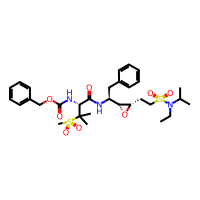
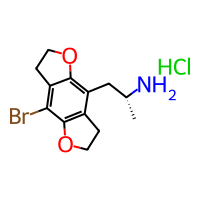
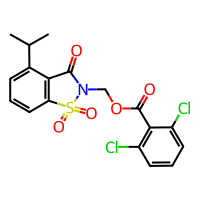
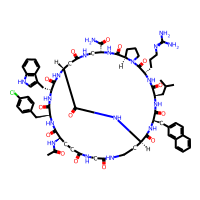
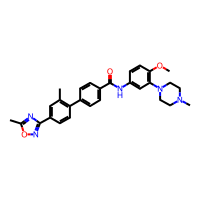

In [3]:
df = PandasTools.LoadSDF('../data/chembl26_very_active.sdf.gz')
df.head()

Move the molecule to the first column

,ROMol,compound_chembl_id,assay_chembl_id,target_chembl_id,pref_name,standard_relation,standard_value,standard_units,standard_type,ID
0,,CHEMBL86971,CHEMBL690412,CHEMBL243,Human immunodeficiency virus type 1 protease,=,0.8,nM,Ki,
1,,CHEMBL6710,CHEMBL621508,CHEMBL324,Serotonin 2c (5-HT2c) receptor,=,0.26,nM,Ki,
2,,CHEMBL314218,CHEMBL677606,CHEMBL248,Leukocyte elastase,=,0.03,nM,Ki,
3,,CHEMBL438897,CHEMBL877834,CHEMBL1855,Gonadotropin-releasing hormone receptor,=,0.24,nM,Ki,
4,,CHEMBL15928,CHEMBL616937,CHEMBL1983,Serotonin 1d (5-HT1d) receptor,=,0.7,nM,Ki,

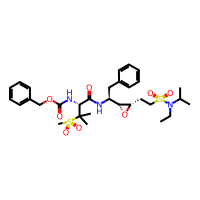
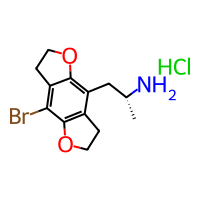
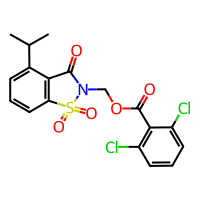
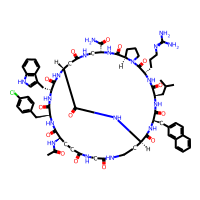
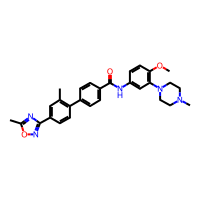

In [8]:
cols = list(df.columns)
cols.insert(0,cols.pop(-1))
df = df[cols]
df.head()

The default drawing style doesn't look great when the molecule images are small like this; the ACS1996 style really works a lot better.

We can use the ACS996 style in the DataFrame by setting the drawing options for `PandasTools`. We do this by creating a new drawing options instance, setting that to ACS1996 mode, and then setting the `drawOptions` variable in the `PandasTools` module.

In [13]:
dopts = Draw.MolDrawOptions()
Draw.SetACS1996Mode(dopts,Draw.MeanBondLength(df.ROMol[0]))

PandasTools.drawOptions = dopts

The new options are now used when we show the DataFrame:

,ROMol,compound_chembl_id,assay_chembl_id,target_chembl_id,pref_name,standard_relation,standard_value,standard_units,standard_type,ID
0,,CHEMBL86971,CHEMBL690412,CHEMBL243,Human immunodeficiency virus type 1 protease,=,0.8,nM,Ki,
1,,CHEMBL6710,CHEMBL621508,CHEMBL324,Serotonin 2c (5-HT2c) receptor,=,0.26,nM,Ki,
2,,CHEMBL314218,CHEMBL677606,CHEMBL248,Leukocyte elastase,=,0.03,nM,Ki,
3,,CHEMBL438897,CHEMBL877834,CHEMBL1855,Gonadotropin-releasing hormone receptor,=,0.24,nM,Ki,
4,,CHEMBL15928,CHEMBL616937,CHEMBL1983,Serotonin 1d (5-HT1d) receptor,=,0.7,nM,Ki,

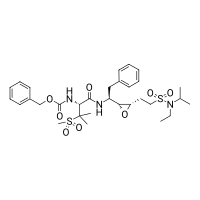
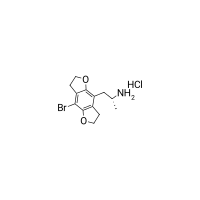
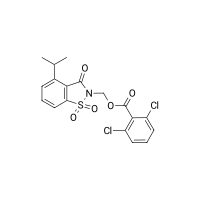
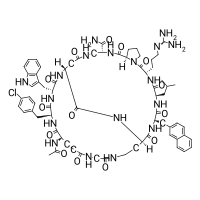
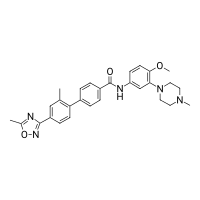

In [14]:
df.head()

The ACS1996 style will also be used when we do things like generate an XLSX file:

In [17]:
PandasTools.SaveXlsxFromFrame(df.head(100),'../data/output.xlsx')

As an aside: we can also set ACS1996 mode for the rendering in the notebook;

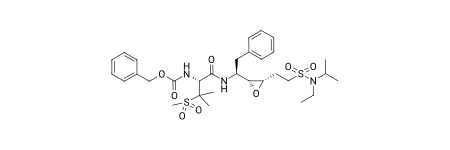

In [18]:
Draw.SetACS1996Mode(IPythonConsole.drawOptions,Draw.MeanBondLength(df.ROMol[0]))

df.ROMol[0]

That style is also used in `Draw.MolsToGridImage()`:


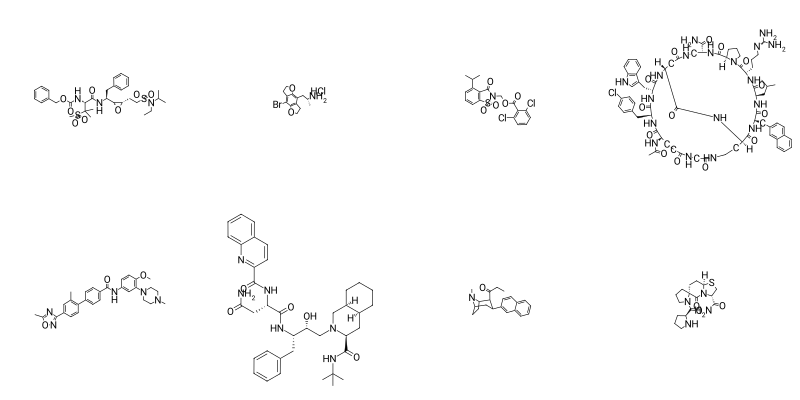

In [20]:
Draw.MolsToGridImage(df.ROMol[:8],molsPerRow=4)